In [ ]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:22pt;padding:5px;}
table.dataframe{font-size:22px;}
</style>
"""))

# ch11_데이터프레임과 시리즈(Pandas)_ 1~8절
## 1절 판다스 패키지
-  데이터 분석을 위해 반드시 알아야 할 패키지(넘파이를 기반으로 하며, 다른 많은 라이브러리와  잘 통합되도록 설계
- 2차원 구조를 갖는 데이터 프레임, 1차원 구조를 갖는 시리즈 제공
- 판다이스의 장점: 데이터 프레임 생성, 파일 io, 레이블링, 부분데이터 추출, 크기 변경(행이나 열 삽입, 삭제),  데이터 분할, 병합, 데이터 구조 변경, 결측치 처리
- https://pypi.python.org/pypi/pandas(package index)
- http:pandas.pydata.org/pandas=docs/stable/api.html(API reference)

In [2]:
import pandas as pd

In [3]:
pd.__version__

'1.5.3'

In [7]:
data=pd.read_json('data/ch09_member1.json' , encoding='cp949')
print(data)
print(type(data))

  name  age    email address
0  홍길동   20  h@h.com      서울
1  김길동   30  k@h.com      부산
2  신길동   40  s@h.com      안양
<class 'pandas.core.frame.DataFrame'>


In [ ]:
http://localhost:8888/lab/tree

# 2절 데이터프레임 만들기
## 2.1 딕셔너리 리스트를 이용해서 데이터 프레임 만들기

In [10]:
d=[{'kor':100,'mat':95},{'kor':90, 'mat':99}]
df=pd.DataFrame(data=d)
df

,kor,mat
0,100,95
1,90,99


In [11]:
df.to_dict()

{'kor': {0: 100, 1: 90}, 'mat': {0: 95, 1: 99}}

In [12]:
df.to_numpy()

array([[100,  95],
       [ 90,  99]], dtype=int64)

In [13]:
df.to_numpy()
df.values

array([[100,  95],
       [ 90,  99]], dtype=int64)

In [14]:
df

,kor,mat
0,100,95
1,90,99


In [15]:
df.dtypes # 열의 타입

kor    int64
mat    int64
dtype: object

In [16]:
df.info() #  별 표시

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   kor     2 non-null      int64
 1   mat     2 non-null      int64
dtypes: int64(2)
memory usage: 160.0 bytes


In [18]:
df['kor'].dtype

dtype('int64')

In [19]:
# 타입변경(열마다)
import numpy as np
df['kor'].astype

<bound method NDFrame.astype of 0    100
1     90
Name: kor, dtype: int64>

In [23]:
# 타입변경(열마다)
import numpy as np
df['kor'].astype(np.float64)
df['kor']=df['kor'].astype('float64')

In [24]:
df['kor'].dtype

dtype('float64')

In [30]:
d=[{'kor':100, 'mat':95}, {'kor':90, 'mat':99},{'kor':92, 'eng':99}]
df=pd.DataFrame(data=d)
df

,kor,mat,eng
0,100,95.0,NaN
1,90,99.0,NaN
2,92,NaN,99.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     3 non-null      int64  
 1   mat     2 non-null      float64
 2   eng     1 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 200.0 bytes


In [32]:
type(np.nan)

float

In [36]:
df['kor']=df['kor'].astype('int32')
df

,kor,mat,eng
0,100,95.0,NaN
1,90,99.0,NaN
2,92,NaN,99.0


# 리스트를 이용, 데이터 프레임 만들기

In [40]:
kor=[100,90, 95,90,95]
mat=[99,100,95,98,94]

df=pd.DataFrame({'kor':kor, 'mat':mat})

In [41]:
np.c_[kor,mat]

array([[100,  99],
       [ 90, 100],
       [ 95,  95],
       [ 90,  98],
       [ 95,  94]])

In [43]:
df=pd.DataFrame(data=np.c_[kor,mat],columns=['국어', '수학'])
df

,국어,수학
0,100,99
1,90,100
2,95,95
3,90,98
4,95,94


In [47]:
l=[['트랜드 코리아 2026','김남더', 18000, '10'],['사탄탱고','라슬로', 17820,10],
   ['미술관 여행자', '카미유주노', 29700,10]]
l

[['트랜드 코리아 2026', '김남더', 18000, '10'],
 ['사탄탱고', '라슬로', 17820, 10],
 ['미술관 여행자', '카미유주노', 29700, 10]]

In [49]:
df=pd.DataFrame(l,columns=['책이름', '저자', '가격', '할인율'])
df

,책이름,저자,가격,할인율
0,트랜드 코리아 2026,김남더,18000,10
1,사탄탱고,라슬로,17820,10
2,미술관 여행자,카미유주노,29700,10


In [ ]:
# %is:ipython: 매직 명령어
# !dir: 쉘명령어

In [57]:
df = pd.read_csv(r'C:\ai\source\01-python\data\상가정보\소상공인시장진흥공단_상가(상권)정보_서울_202503.csv')
df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,...,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.981840,37.586250
1,MA010120220800000036,한국황토건축연구소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,1165010800113080025020133,강남오피스텔,서울특별시 서초구 서초대로73길 40,137856,6612,NaN,11,NaN,127.024563,37.500924
2,MA010120220800000077,소망공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,1120012200100040011000899,NaN,서울특별시 성동구 용답중앙15길 18,133847,4805,NaN,1,NaN,127.054262,37.564786
3,MA010120220800000084,고향집,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1111015400100800000000001,NaN,서울특별시 종로구 돈화문로4길 30,110430,3193,NaN,NaN,NaN,126.993820,37.570025
4,MA010120220800000090,보석나라,NaN,G2,소매,G217,시계·귀금속 소매,G21701,시계/귀금속 소매업,G47830,...,1153010700103590008007958,NaN,서울특별시 구로구 개봉로3길 23,152815,8353,NaN,1,NaN,126.855046,37.486242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540512,MA0101202502A0113097,동양에이전시,NaN,M1,과학·기술,M105,광고,M10504,광고물 설계/제작업,M71393,...,1144012000103470021024741,기린빌딩,서울특별시 마포구 어울마당로 130,121837,4053,NaN,3,NaN,126.924524,37.555810
540513,MA0101202502A0113099,서관면옥,NaN,M1,과학·기술,M107,본사·경영 컨설팅,M10703,경영 컨설팅업,M71531,...,1114012400100540000023233,신세계백화점,서울특별시 중구 퇴계로 77,100011,4530,NaN,14,NaN,126.980771,37.560355
540514,MA0101202502A0113654,아리가,NaN,I2,음식,I203,일식,I20301,일식 회/초밥,I56122,...,1165010800113600031023092,정진빌딩,서울특별시 서초구 강남대로41길 15-19,137863,6730,NaN,2,NaN,127.032179,37.486407
540515,MA0101202502A0113657,백압관,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1168010400100530003017865,NaN,서울특별시 강남구 학동로97길 74,135952,6071,NaN,1,NaN,127.053113,37.524197


In [62]:
# 판다스 디스플레이 옵션
pd.options.display.max_columns=39
pd.options.display.max_rows=70

In [63]:
df.head(1).T

,0
상가업소번호,MA010120220800000033
상호명,부동산임대김은숙
지점명,NaN
상권업종대분류코드,I2
상권업종대분류명,음식
상권업종중분류코드,I212
상권업종중분류명,비알코올
상권업종소분류코드,I21201
상권업종소분류명,카페
표준산업분류코드,I56229


## read_csv

In [65]:
# (1) csv  파일 블러오기 (기본값)
member=pd.read_csv('data/ch11_member.csv')
                    #, encoding='utf-8', sep=',',commet 주서거리 안함
                    )
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,#홍길뜽,24,non@not.com,없는구,2000-01-01


In [67]:
# (1) csv  파일 블러오기 (기본값)
member=pd.read_csv('data/ch11_member.csv')
                    #, encoding='utf-8', sep=',',comment 주석처리 안함
                    )
member.info()

IndentationError: unexpected indent (1870674342.py, line 4)

In [69]:
# 문자형으로 읽어드린 Birth datetime 형으로
# 형 변환: astype('int64'), astype('datetime64') : 비추. 숫자
#          to_datetime() 함수, 날짜
member['Birth'].astype('datetime64') 비추
member['Birth']=pd.to_datetime(member['Birth'])
member.head(1)

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [70]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     6 non-null      object        
 1   Age      6 non-null      int64         
 2   Email    6 non-null      object        
 3   Address  6 non-null      object        
 4   Birth    6 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 368.0+ bytes


In [71]:
import numpy as np
member['Age']=member['Age'].astype(np.int16)
member.dtypes

Name               object
Age                 int16
Email              object
Address            object
Birth      datetime64[ns]
dtype: object

In [73]:
# (2) 특정행을 제외하고, csv 파일 읽어오기
member=pd.read_csv('data/ch11_membercp949.csv',
                  encoding='cp949',
                  skiprows=[1,6])
member

,Name,Age,Email,Address,Birth
0,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
1,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
2,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
3,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [76]:
# (3) 상위 몇행마 sep 문자는 ,아닌 csv 파일 읽어오기
member=pd.read_csv('data/ch11_membersep.csv',
                    nrows=5,
                    sep='|')
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [81]:
# (4) 주석 (#) 제외,datetime형 필드 지정하여 csv
member=pd.read_csv('data/ch11_membertab.csv',
                  sep='\t',
                  comment='#',
                  parse_dates=['Birth'])
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     5 non-null      object        
 1   Age      5 non-null      int64         
 2   Email    5 non-null      object        
 3   Address  5 non-null      object        
 4   Birth    5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 328.0+ bytes


# 2. 4패키지에서 가져오기: iris  데이터
- iris 가저오는 법1: sklearn(머신러닝 패키지
- iris: statsmodels(R 데이터)
- iris: seaborn(시각화 패키지)
## 2.4.1 iris 방법1: sklearn
- sklearn.datasets 모듈 데이터터(iris)를 데이터 프레임으로 변환

In [84]:
from sklearn import datasets # 머신러링 공부학습 데이터 제공, # 화투 놀이, # 타이탄 위치, 사망생존
# sklearn 패키지에서 제공되는 데이터셋은 
iris=datasets.load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [85]:
from sklearn import datasets # 머신러링 공부학습 데이터 제공, # 화투 놀이, # 타이탄 위치, 사망생존
# sklearn 패키지에서 제공되는 데이터셋은 
iris=datasets.load_iris()
iris # Bunch 타입

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [87]:
from sklearn import datasets # 머신러링 공부학습 데이터 제공, # 화투 놀이, # 타이탄 위치, 사망생존
# sklearn 패키지에서 제공되는 데이터셋은 
iris=datasets.load_iris()
iris.get('data')

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [89]:
from sklearn import datasets # 머신러링 공부학습 데이터 제공, # 화투 놀이, # 타이탄 위치, 사망생존
# sklearn 패키지에서 제공되는 데이터셋은 
iris=datasets.load_iris()
print(type(iris))
# print(iris)
# print(isis.DESCR)
print(iris.keys())

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [90]:
# 데이터프레임의 열이름(비추)
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [92]:
# 데이터프레임의 열이름(강추)
iris.feature_names
[col for col in iris.feature_names]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [94]:
# 데이터프레임의 열이름(강추)
iris.feature_names
[col[:5].replace(' ','_') for col in iris.feature_names]

['sepal', 'sepal', 'petal', 'petal']

In [95]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [96]:
iris.target 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [98]:
iris.target #  ml dl  학습시 타켓변수(종속변수)
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [99]:
iris.target_names 

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [100]:
iris.target_names[iris.target] # 데이터프레임에 쓸 타켓변수(가장 오른 열)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [103]:
# 독립변수
data=iris.data
# 종속
target=iris.target_names[iris.target].reshape(-1,1)
print(data[:3], target[:3])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]] [['setosa']
 ['setosa']
 ['setosa']]


In [106]:
# 1. 
df=pd.DataFrame(np.hstack((data,target)),
                 columns=iris.feature_names+['species'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [107]:
df.species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [112]:
# df.sepal length(cm)
# df['sepal length (cm)'']
[col[:-5].replace(' ', '_') for col in iris.feature_names]+['species']
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa


In [2]:
import pandas as pd

In [3]:
X = pd.DataFrame(iris.data, 
                 columns=[col[:-5].replace(' ', '_') for col in iris.feature_names])
X.head(1)

NameError: name 'iris' is not defined

In [114]:
y=pd.DataFrame(iris.target_names[iris.target],columns=['species'])
y.head(1)

,species
0,setosa


In [121]:
iris_df=pd.concat([X,y],axis=1)
iris_df.info()

NameError: name 'X' is not defined

## 2.4.2 iris 방법 1:

In [6]:
# R 데이터 가져오기
from statsmodels.api import datasets
oiris_daaaset=datasets.get_rdataset('iris',
                                   package='datasets',
                                   cache=True)
iris_dataset

NameError: name 'iris_dataset' is not defined

In [11]:
iris=iris_dataset

In [12]:
iris['Sepal.Lengtrh']
# iris.Sepal.Length # 

KeyError: 'Sepal.Lengtrh'

In [13]:
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [ ]:
iris.columns

In [9]:
import statsmodels.api as sm

# R의 iris 데이터셋 로드
iris_dataset = sm.datasets.get_rdataset('iris', package='datasets', cache=True)

# 실제 데이터 가져오기
iris_dataset = iris_dataset.data
print(iris_dataset.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


### 2.4.3

In [15]:
import seaborn as sns
iris=sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [16]:
# 데이터프레임을 파일로 출력
iris.to_csv('data/ch11_iris.csv',
           sep=',', encoding='utf-8', # 기본값
           )

In [17]:
# 데이터프레임을 파일로 출력
iris.to_csv('data/ch11_iris.csv',
           sep=',', encoding='utf-8', # 기본값
           index=False) # 행이름이 생략되서 파일 출력

In [18]:
iris.to_csv('data/ch11_iris.csv.gz',
           index=False,
           compression='infer') # 파일 확장자에 맞게 압축

In [19]:
import pandas as pd
read_iris=pd.read_csv('data/ch11_iris.csv')

In [22]:
import pandas as pd
# read_iris=pd.read_csv('data/ch11_iris.csv')
read_iris=pd.read_csv('data/ch11_iris.csv', compression='infer')
read_iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


# 3절 이름(열, 행) 지정하기
## 열이름 지정하기

In [30]:
member=pd.read_csv('data/ch11_member.csv',
                   comment='#',
                   parse_dates=['Birth'])
member.head(1)

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [31]:
member.columns=['이름', '나이', '메일', '주소','생일']
member.head(1)

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


# 3.2 행이름 지정

In [32]:
member.index=range(11,16)
member

,이름,나이,메일,주소,생일
11,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
12,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
13,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
14,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
15,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [34]:
member.index=['동', '서', '남', '북', '중']
member

,이름,나이,메일,주소,생일
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [35]:
#member['이름']['동'] 비추
member.loc['동', '이름'] 

'홍길동'

In [36]:
# index를 이름열로 (실행결과가 출력되어 나오면 return될 뿐, member는 안 바뀜)
member.set_index('이름')

,나이,메일,주소,생일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
홍길서,30,seo@hong.com,서울시 중구,1999-12-01
홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [37]:
# index를 이름열로 (실행결과가 출력되어 나오면 return될 뿐, ember는 안 바뀜)
member1=member.set_index('이름')
member1

,나이,메일,주소,생일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
홍길서,30,seo@hong.com,서울시 중구,1999-12-01
홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [38]:
member.set_index('이름',inplace=True)

In [39]:
member

,나이,메일,주소,생일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
홍길서,30,seo@hong.com,서울시 중구,1999-12-01
홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [40]:
member.index

Index(['홍길동', '홍길서', '홍길남', '홍길북', '홍길중'], dtype='object', name='이름')

In [41]:
# 인덱스를 컬럼으로 편입시키기
member.reset_index()

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [42]:
# 인덱스를 컬럼으로 편입시키기
member.reset_index(inplace=True)

In [43]:
member

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [44]:
member.index=[0,1,2,0,1]
member

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
0,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
1,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [45]:
# 기존 index
member.index=range(len(member))
member

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [46]:
# 기존 index
# member.index=range(len(member))
member= member.reset_index(drop=True)
member

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [47]:
# datetime 열어서 날짜 시간 정보 추출
member['생일']

0   1999-01-01
1   1999-12-01
2   1999-11-01
3   1999-05-01
4   1999-01-30
Name: 생일, dtype: datetime64[ns]

In [48]:
member['생일'].dt.month

0     1
1    12
2    11
3     5
4     1
Name: 생일, dtype: int64

In [49]:
member['생일'].dt.month # 0:월, 1:화,, ...5:토, 6:일

0     1
1    12
2    11
3     5
4     1
Name: 생일, dtype: int64

## 3.3 레벨이름 지정하기

In [50]:
member

,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [51]:
print(member.columns)
print(member.columns.name)

Index(['이름', '나이', '메일', '주소', '생일'], dtype='object')
None


In [52]:
member.columns.name='정보'
member

정보,이름,나이,메일,주소,생일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [53]:
member.columns=[['기본정보', '기본정보', '기본정보', '추가정보', '추가정보'],
                ['이름', '나이', '메일', '주소', '생일']]
member.columns.names=['대분류', '소분류']
member

대분류 기본정보                        추가정보           
소분류   이름  나이             메일       주소         생일
0    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
1    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
2    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
3    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
4    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [54]:
member.index=[['좌우', '좌우', '상하', '상하', '상하'],
             ['동', '서', '남', '북', '중']]
member.index.names=['레벨1', '레벨2']
member

대분류     기본정보                        추가정보           
소분류       이름  나이             메일       주소         생일
레벨1 레벨2                                            
좌우  동    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
    서    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
상하  남    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
    북    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
    중    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [57]:
member.loc[('상하','중'), '기본정보']

소분류
이름             홍길중
나이              23
메일    mid@hong.com
Name: (상하, 중), dtype: object

In [55]:
member.loc[('상하', '북'), ('기본정보', '이름')]

'홍길북'

In [56]:
member.loc['상하', '기본정보']

소분류,이름,나이,메일
레벨2,,,
남,홍길남,21,nam@hong.com
북,홍길북,22,buk@hong.com
중,홍길중,23,mid@hong.com


# 4절 부분 데이터 조회

In [60]:
member=pd.read_csv('data/ch11_member.csv',
                  comment='#',
                  parse_dates=['Birth'])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 4.1 단일 열 조회

In [61]:
member['Name']
member.Name

0    홍길동
1    홍길서
2    홍길남
3    홍길북
4    홍길중
Name: Name, dtype: object

In [ ]:
# member[0] # 행이르ㅡ로 

In [63]:
member[['Name','Address']]

,Name,Address
0,홍길동,서울시 강동구
1,홍길서,서울시 중구
2,홍길남,서울시 강동구
3,홍길북,서울시 관악구
4,홍길중,부산시 중구


## 4.2 loc를 이용한 조회
-df.loc[행이름, 열이름]
    * 행이름과 열이름에 슬라이싱 from:to
    * 행이름과 열이름에 리스트

In [66]:
member.loc[0:2]
member.loc[0:2,]
member.loc[0:2,:]
member.loc[0:2,...]


,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [68]:
member.index=['동', '서', '남', '북', '중']
member.loc['동':'남']


,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [70]:
member.loc['동':'남', 'Name':'Address']


,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
서,홍길서,30,seo@hong.com,서울시 중구
남,홍길남,21,nam@hong.com,서울시 강동구


In [73]:
member.loc[['동','남'], ['Name', 'Email','Address']]

,Name,Email,Address
동,홍길동,hong@hong.com,서울시 강동구
남,홍길남,nam@hong.com,서울시 강동구


In [74]:
member.loc[:, 'Name']

동    홍길동
서    홍길서
남    홍길남
북    홍길북
중    홍길중
Name: Name, dtype: object

## 4.3 iloc를 이용한 조회

```
-df.loc[행순번, 열순번] :행순번, 열순번으로 조회
    * 행순번과 열순번에 슬라이싱 from:to
    * 행순번과 열순번에 리스트
```

In [77]:
# 동(0)행부터 남(2)행까지 모든 열
member.iloc[0:3]
member.iloc[0:3,]
member.iloc[0:3,:]
member.iloc[0:3,...]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [78]:
# 0번째 행
type(member.iloc[0])

pandas.core.series.Series

In [79]:
# 동행붙 남행까지 Name(0)열부터 Address(3)열까지
member.iloc[0:3, 0:4]
member.iloc[0:3, 0:-1]

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
서,홍길서,30,seo@hong.com,서울시 중구
남,홍길남,21,nam@hong.com,서울시 강동구


In [80]:
# 짝수번째 행의 마지막 열 제외하고 출력
member.iloc[::2, :-1]

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
남,홍길남,21,nam@hong.com,서울시 강동구
중,홍길중,23,mid@hong.com,부산시 중구


In [82]:
# 
member.iloc[::-1]

,Name,Age,Email,Address,Birth
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [83]:
# 동(0)행 남(2)행까지
member.iloc[[0,2],[0,2,3]]

,Name,Email,Address
동,홍길동,hong@hong.com,서울시 강동구
남,홍길남,nam@hong.com,서울시 강동구


In [84]:
# Name
member.iloc[:,0]
member.iloc[...,0]

동    홍길동
서    홍길서
남    홍길남
북    홍길북
중    홍길중
Name: Name, dtype: object

In [ ]:
# 

# 4.4 조건으로 조회하기

In [85]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [86]:
member['Name']=='홍길남'

동    False
서    False
남     True
북    False
중    False
Name: Name, dtype: bool

In [87]:
member[member['Name']=='홍길남']
member.loc[member['Name']=='홍길남']

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [88]:
# Name 홍길남의 이름과  나이 Eamil
member.loc[member['Name']=='홍길남', 'Name': 'Email']

,Name,Age,Email
남,홍길남,21,nam@hong.com


In [89]:
# Name 홍길남의 이름과 Eamil
member.loc[member['Name']=='홍길남', ['Name', 'Email']]

,Name,Email
남,홍길남,nam@hong.com


In [93]:
# 23세 이상 데이터 조회(모든 열)
member.loc[member['Age']>=23]
member.loc[member['Age']>=23,]
member.loc[member['Age']>=23,:]
member.loc[member['Age']>=23, ...]
member[member['Age']>=23]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [94]:
# 23세 이상 Namem Age, Email
member.loc[member['Age']>=23, 'Name':'Email']

,Name,Age,Email
서,홍길서,30,seo@hong.com
중,홍길중,23,mid@hong.com


In [ ]:
# 23세 이상 Namem Age, Address
member.loc[mem

In [95]:
member[~(member['Age']>=23)]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [98]:
address='서울시 관악구'
print('서울시로 시작하는지여 여부;', address.startswith('서울시'))
print('중구가 포함 여부:', address.find('중구')!=-1)

서울시로 시작하는지여 여부; True
중구가 포함 여부: False


In [ ]:
# member['Address'].startswith('서울시')
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling


In [99]:
member['Address'].str.startswith('서울시')

동     True
서     True
남     True
북     True
중    False
Name: Address, dtype: bool

In [100]:
member[member['Address'].str.startswith('서울시')]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [102]:
# Address에 중구 포함 데이터
member['Address'].str.find('중구')!=-1

동    False
서     True
남    False
북    False
중     True
Name: Address, dtype: bool

In [103]:
# Address에 중구 포함 데이터 2
member[member['Address'].str.contains('중구')]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [104]:
# 시리즈.isin([])
# 이름이 홍길동이너 홍길남인 데이터
member['Name'].isin(['홍길동','홍길남'])

동     True
서    False
남     True
북    False
중    False
Name: Name, dtype: bool

In [ ]:
# 시리즈.isin([])
# 이름이 홍길동이너 홍길남인 데이터
member['Name'].isin(['홍길동','홍길남'])

In [106]:
# 시리즈.isin([])
# 이름이 홍길동이너 홍길남인 데이터
member.loc[member['Name'].isin(['홍길동','홍길남']),['Name', 'Address','Birth']]

,Name,Address,Birth
동,홍길동,서울시 강동구,1999-01-01
남,홍길남,서울시 강동구,1999-11-01


In [107]:
member[member['Birth']dt.year<2000]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (989348144.py, line 1)

In [114]:
# 조건 연산자를 이용햇허 추출 조건(2개)
import pandas as pd
import numpy as np
data=pd.DataFrame({'eng':[100,80,np.nan,85],
                  'kor':[100,80,60,np.nan]})
display(data)
# 영어 80이상이고, 국어80이상 데이터 추출
data[(data['eng']>=80) &(data['kor']>=80)]

,eng,kor
0,100.0,100.0
1,80.0,80.0
2,NaN,60.0
3,85.0,NaN


,eng,kor
0,100.0,100.0
1,80.0,80.0


In [115]:
# 결측치 확인 방법1
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   eng     3 non-null      float64
 1   kor     3 non-null      float64
dtypes: float64(2)
memory usage: 192.0 bytes


In [116]:
# 결측치 확인 방법2
data.isna() # r결측치 여부

,eng,kor
0,False,False
1,False,False
2,True,False
3,False,True


In [117]:
True +True+False

2

In [120]:
data.isna().sum()

eng    1
kor    1
dtype: int64

- 데이터프레임 조건 추출 qiiz

In [121]:
# iris 가져오기

# 1. sepal_length 열만 출력

# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)

# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)

# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)

# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)

# 6. species가 versicolor인 데이터의 모든 열

# 7. species가 setosa인 데이터 최초 5개 행만 출력

# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력

# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'

# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열

In [ ]:
# iris 가져오기(sklearn, statsmodels, seaborn)
import seaborn as sns
iris = sns.load_dataset('iris')
display(iris.head(1))
# 1. sepal_length 열만 출력
iris['sepal_length']
# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)
iris.loc[0:10, 'sepal_length':'petal_width']
iris.iloc[0:11, :-1]
# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)
iris.loc[3:10, ['sepal_length','petal_length']]
iris.iloc[3:11, [0,2]]
# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)
iris.loc[0:100:50]
iris.loc[[0, 50,100]]
iris.iloc[0:101:50]
# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)
iris.loc[0:125:25, 'petal_length':'petal_width']
iris.iloc[0:126:25, 2:-1]
# 6. species가 versicolor인 데이터의 모든 열
iris[iris['species']=='versicolor']
# 7. species가 setosa인 데이터 최초 5개 행만 출력
iris[iris['species']=='setosa'].head()
iris[iris['species']=='setosa'].iloc[:5]
# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력
iris[iris['sepal_length']>=6.5].head()
iris[iris['sepal_length']>=6.5].iloc[:5]
# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'
iris.loc[iris['sepal_length']>=7.2, 'sepal_length':'petal_length']
iris[iris['sepal_length']>=7.2][['sepal_length','sepal_width','petal_length']]
# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열
iris[(iris['species']=='versicolor') & (iris['sepal_length']>6.5)]
import numpy as np
iris[np.logical_and(iris['species']=='versicolor', iris['sepal_length']>6.5)]

In [11]:
# iris 가져오기(sklearn, statsmodels, seaborn)
import seaborn as sns
iris = sns.load_dataset('iris')
display(iris.head(1))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [12]:
iris = sns.load_dataset('iris')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [13]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
# 1. sepal_length 열만 출력
iris['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [15]:
# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)
iris.loc[0:10, 'sepal_length':'petal_width']
iris.iloc[0:11, :-1]


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [16]:
# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)
iris.loc[3:10, ['sepal_length','petal_length']]
iris.iloc[3:11, [0,2]]

,sepal_length,petal_length
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7
6,4.6,1.4
7,5.0,1.5
8,4.4,1.4
9,4.9,1.5
10,5.4,1.5


In [17]:
# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)
iris.loc[0:100:50]
iris.loc[[0, 50,100]]
iris.iloc[0:101:50]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


In [18]:
# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)
iris.loc[0:125:25, 'petal_length':'petal_width']
iris.iloc[0:126:25, 2:-1]

,petal_length,petal_width
0,1.4,0.2
25,1.6,0.2
50,4.7,1.4
75,4.4,1.4
100,6.0,2.5
125,6.0,1.8


In [19]:
# 6. species가 versicolor인 데이터의 모든 열
iris[iris['species']=='versicolor']

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [20]:
# 7. species가 setosa인 데이터 최초 5개 행만 출력
iris[iris['species']=='setosa'].head()
iris[iris['species']=='setosa'].iloc[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력
iris[iris['sepal_length']>=6.5].head()
iris[iris['sepal_length']>=6.5].iloc[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor


In [22]:
# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'
iris.loc[iris['sepal_length']>=7.2, 'sepal_length':'petal_length']
iris[iris['sepal_length']>=7.2][['sepal_length','sepal_width','petal_length']]

,sepal_length,sepal_width,petal_length
105,7.6,3.0,6.6
107,7.3,2.9,6.3
109,7.2,3.6,6.1
117,7.7,3.8,6.7
118,7.7,2.6,6.9
122,7.7,2.8,6.7
125,7.2,3.2,6.0
129,7.2,3.0,5.8
130,7.4,2.8,6.1
131,7.9,3.8,6.4


In [23]:
# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열
iris[(iris['species']=='versicolor') & (iris['sepal_length']>6.5)]
import numpy as np
iris[np.logical_and(iris['species']=='versicolor', iris['sepal_length']>6.5)]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


In [24]:
import numpy as np

In [25]:
iris[np.logical_and(iris['species']=='versicolor',
              iris['sepal_length']>6.5)]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


In [ ]:
* 데이터 프레임의 부분 데이터 조회방법
- df[열이름]: 특정열 조회
- df[조건]: 조건에 맞는 모든 행 조회
- df.loc[행이름, 열이름]
    - 행이름, 열이름 자리에 슬라이싱,리스트
    - 열이름 생략 시 모든 열
    - 행이름 자리에 조건
- df.iloc[행순번, 열순번]
    - 행이름, 열이름 자리에 슬라이싱, 리스트
    - 열이름 생략시 모든 열

# 5절 데이터 삭제, 추가
## 5.1 데이터프레임의 요소 삭제
-df.drop(삭제할 열이름, 행이름, axis): axis=0, 행 삭제, axis=1, 열 삭제
    * axis=0(기본값) 행 삭제,  axis=1, 열 삭제

In [144]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [145]:
# 1) 단일 행 삭제
member.drop('중', axis=0) # 삭제 결과를 member 적용

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [146]:
# 1) 단일 행 삭제
member.drop('중', axis=0) 
# 삭제 결과를 member 적용 (1) 할당 member=member.drop('중', axis=0)
#                        (2) member.drop('중')

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [148]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [149]:
# 2) 복수  행 삭제
member.drop(['동', '서', '남'])

,Name,Age,Email,Address,Birth
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [150]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [151]:
# 3) 열 삭제
member.drop(['Name', 'Email'], axis=1)

,Age,Address,Birth
동,20,서울시 강동구,1999-01-01
서,30,서울시 중구,1999-12-01
남,21,서울시 강동구,1999-11-01
북,22,서울시 관악구,1999-05-01
중,23,부산시 중구,1999-01-30


# 5.2 데이터프레림 요소 추가

In [153]:
# 1) 열 추가
member['nickname']='빼곰이'
member

,Name,Age,Email,Address,Birth,nickname
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,빼곰이
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,빼곰이
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,빼곰이
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,빼곰이
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,빼곰이


In [155]:
# 2) 리스트를 이용한 열 추가
member['favorite_no']=[3,2,7,None,12]
member

,Name,Age,Email,Address,Birth,nickname,favorite,favorite_no
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,빼곰이,3.0,3.0
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,빼곰이,2.0,2.0
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,빼곰이,7.0,7.0
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,빼곰이,NaN,NaN
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,빼곰이,12.0,12.0


In [156]:
# 3) 
member['favorite_num']=None
member

,Name,Age,Email,Address,Birth,nickname,favorite,favorite_no,favorite_num
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,빼곰이,3.0,3.0,None
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,빼곰이,2.0,2.0,None
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,빼곰이,7.0,7.0,None
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,빼곰이,NaN,NaN,None
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,빼곰이,12.0,12.0,None


In [157]:
# 3) 
member['favorite_num']=np.nan
member.iloc[::2,-1]=7
member

,Name,Age,Email,Address,Birth,nickname,favorite,favorite_no,favorite_num
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,빼곰이,3.0,3.0,7.0
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,빼곰이,2.0,2.0,NaN
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,빼곰이,7.0,7.0,7.0
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,빼곰이,NaN,NaN,NaN
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,빼곰이,12.0,12.0,7.0


In [159]:
member=member.drop('favorite', axis=1)

In [160]:
# 4) 딕셔너리로 행 추가
member.drop(['Email', 'Birth', 'favorite_no', 'favorite_num'],axis=1)

,Name,Age,Address,nickname
동,홍길동,20,서울시 강동구,빼곰이
서,홍길서,30,서울시 중구,빼곰이
남,홍길남,21,서울시 강동구,빼곰이
북,홍길북,22,서울시 관악구,빼곰이
중,홍길중,23,부산시 중구,빼곰이


In [163]:
# 4) 딕셔너리로 행 추가
new_member=pd.DataFrame([
    {'Name': '홍길쑥', 'Age':30, 'Address': '서울', 'nickname': '빠곰이'}
    ])
member=pd.concat([member,new_member])
member

,Name,Age,Email,Address,Birth,nickname,favorite_no,favorite_num
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,빼곰이,3.0,7.0
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,빼곰이,2.0,NaN
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,빼곰이,7.0,7.0
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,빼곰이,NaN,NaN
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,빼곰이,12.0,7.0
0,홍길쑥,30,NaN,서울,NaT,빠곰이,NaN,NaN


In [165]:
member=pd.concat([member,new_member]).reset_index(drop=True)
member

,Name,Age,Email,Address,Birth,nickname,favorite_no,favorite_num
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,빼곰이,3.0,7.0
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,빼곰이,2.0,NaN
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,빼곰이,7.0,7.0
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,빼곰이,NaN,NaN
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,빼곰이,12.0,7.0
5,홍길쑥,30,NaN,서울,NaT,빠곰이,NaN,NaN
6,홍길쑥,30,NaN,서울,NaT,빠곰이,NaN,NaN


# 6절 데이터 병합과 연결
## 6.1 merge()

In [169]:
df1=pd.DataFrame({'key':['a', 'b', 'c', 'd'],
                 'c1':[1,2,3,4]})
df2=pd.DataFrame({'key':['a', 'b', 'c', 'd'],
                 'c2':[1,2,3,4]})
df1.merge(df2) # 내부 조인(양쪽 다 일치는 데이터만 병합)

,key,c1,c2
0,a,1,1
1,b,2,2
2,c,3,3
3,d,4,4


In [ ]:
df1=pd.DataFrame({'key':['a', 'b', 'c', 'd'],
                 'c1':[1,2,3,4]})
df2=pd.DataFrame({'key':['a', 'b', 'c', 'd'],
                 'c2':[1,2,3,4]})
df1.merge(df2) # how='inner' 기본값 #  내부 조인(양쪽 다 일치는 데이터만 병합)

In [170]:
df1.merge(df2, how='left') # 왼쪽 df1 데이터 모두 남기고 오른쪽 df2가 매칭

,key,c1,c2
0,a,1,1
1,b,2,2
2,c,3,3
3,d,4,4


In [171]:
df1.merge(df2, how='right') # 오른쪽 df2데이터 모두 남기고 왼쪽 df1가 매칭

,key,c1,c2
0,a,1,1
1,b,2,2
2,c,3,3
3,d,4,4


In [172]:
df1.merge(df2, how='outer') # 양쪽 데이터 모두 남김

,key,c1,c2
0,a,1,1
1,b,2,2
2,c,3,3
3,d,4,4


In [173]:
df3=pd.DataFrame({'key3':['a', 'b', 'c', 'd'],
                 'c1':[1,2,3,4]})
df4=pd.DataFrame({'key4':['a', 'b', 'c', 'd'],
                 'c2':[1,2,3,4]})
display(df3)
display(df4)

,key3,c1
0,a,1
1,b,2
2,c,3
3,d,4


,key4,c2
0,a,1
1,b,2
2,c,3
3,d,4


In [176]:
df3=pd.DataFrame({'key3':['a', 'b', 'c', 'd'],
                 'c1':[1,2,3,4]})
df4=pd.DataFrame({'key4':['a', 'b', 'c', 'd'],
                 'c2':[1,2,3,4]})
df3.merge(df4, left_on='key3',right_on='key4',how='inner')

,key3,c1,key4,c2
0,a,1,a,1
1,b,2,b,2
2,c,3,c,3
3,d,4,d,4


## 6.2 concat() 이용, 데이터프레임 연결
-pd.concat([df1,df2, df3..],axis)
    * axis=0(기본값): 위아래 연결
    * axis=1: 좌우 연결

In [177]:
df3=pd.DataFrame({'key3':['a', 'b', 'c', 'd'],
                 'c1':[1,2,3,4]})
df4=pd.DataFrame({'key4':['a', 'b', 'c', 'f'],
                 'c2':[10,20,30,40]})
pd.concat([df3,df4]) # 좌우 연결

,key3,c1,key4,c2
0,a,1.0,NaN,NaN
1,b,2.0,NaN,NaN
2,c,3.0,NaN,NaN
3,d,4.0,NaN,NaN
0,NaN,NaN,a,10.0
1,NaN,NaN,b,20.0
2,NaN,NaN,c,30.0
3,NaN,NaN,f,40.0


In [178]:
df3=pd.DataFrame({'key':['a', 'b', 'c', 'd'],
                 'c1':[1,2,3,4]})
df4=pd.DataFrame({'key':['a', 'b', 'c', 'f'],
                 'c1':[10,20,30,40]})
display(df3)
display(df4)

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4


,key,c1
0,a,10
1,b,20
2,c,30
3,f,40


In [180]:
df3=pd.DataFrame({'key':['a', 'b', 'c', 'd'],
                 'c1':[1,2,3,4]})
df4=pd.DataFrame({'key':['a', 'b', 'c', 'f'],
                 'c1':[10,20,30,40]})
pd.concat([df3,df4]).reset_index(drop=True)

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4
4,a,10
5,b,20
6,c,30
7,f,40


# 7절 (행이름, 열이름, 값에 의한 정렬)
- df.sort_index(axis): 행 또는 열 이름으로 정렬
- df.sort_values(by=[정렬기준이될 열이름],ascending=T/F, inplace=T/F): 특정 열 값에 의한 정렬

In [181]:
member=pd.read_csv('data/ch11_member.csv',comment='#')
member.index=['동', '서', '남', '북','중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.1 행이름으로 정렬

In [184]:
member.sort_index(axis=0) # ascending=True 오름차순()


,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [185]:
member.sort_index((axis=0)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1254870986.py, line 1)

# 7.3 값에 의한 정렬

In [186]:
member.sort_values(by='Age')

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01


In [187]:
member.sort_values(by='Age', ascending=False)

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [188]:
# Age 기준, 오름차순, Age
member.loc[:,'Age']=[20,20,30,30,30]
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,20,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,30,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,30,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,30,mid@hong.com,부산시 중구,1999-01-30


In [189]:
member.sort_values(by=['Age', 'Email'], ascending=[False, True])

,Name,Age,Email,Address,Birth
북,홍길북,30,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,30,mid@hong.com,부산시 중구,1999-01-30
남,홍길남,30,nam@hong.com,서울시 강동구,1999-11-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,20,seo@hong.com,서울시 중구,1999-12-01


# 8절 기초 통계 분석
- 판다스는 기초통계(데이터 요약), statmodels: 난이도 통계
- count: NaN을 제외한 데이터 수
- min: 최소값
- max
- sum
- cumsum: 누적합
- cumprod: 누적곱
- mean: 평균
- median: 중간값, 중위수
- std: 표준편차
 - var: 분산
 -quantile: 분위수(0사분사위수==최소갑, 1사분위수, 2사분윗(중위값), 3사분위수, 4사분위수(최대값)
 * 이상치 구하는 용도:Q1-1.5*IQR~Q3+1.5*IQR 외의 데이터는 이상치
 -describe: 요약 통계량
 -corr: 상관관게(계수)
 -rolling(n).mean():n개씩 평균 출력 - 데이터 변동이 많을 때 추세 패턴을 부드럽게  보고 싶을 때

In [2]:
from statsmodels.api import datasets
iris=datasets.get_rdataset('iris').data
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
from statsmodels.api import datasets
iris=datasets.get_rdataset('iris').data
iris.columns = [col.lower().replace('.','_') for col in iris.columns]
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


## 8.1 min, max,...

In [4]:
iris.min() #  열별 최소값(axis=0)

Sepal.Length       4.3
Sepal.Width        2.0
Petal.Length       1.0
Petal.Width        0.1
Species         setosa
dtype: object

In [5]:
iris.min(axis=0)

Sepal.Length       4.3
Sepal.Width        2.0
Petal.Length       1.0
Petal.Width        0.1
Species         setosa
dtype: object

In [6]:
iris.min(0)

Sepal.Length       4.3
Sepal.Width        2.0
Petal.Length       1.0
Petal.Width        0.1
Species         setosa
dtype: object

In [22]:
iris.min(axis=0)

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [9]:
iris.median(axis=0, numeric_only=True) # 숫자 필드만 중위수 계산

Sepal.Length    5.80
Sepal.Width     3.00
Petal.Length    4.35
Petal.Width     1.30
dtype: float64

In [28]:
X=iris.loc[:,'sepal_length': 'petal_width']
X=iris.iloc[:,:-1]
X.mean(axis='rows')

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [29]:
X.mean(axis=1)
X

0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

In [33]:
import pandas as pd
df=pd.DataFrame(data=[1,3,4,7,10],columns=['value'])
df['value'].quantile(q=[0,0.25,0.55, 0.75, 1],interpolation='nearest')


0.00     1
0.25     3
0.55     4
0.75     7
1.00    10
Name: value, dtype: int64

In [34]:
# interpolation='midpoint': 정확한 구간 값 없을 경우 환산 출력
df['value'].quantile(q=[0,0.3,0.55, 0.8, 1],interpolation='midpoint')


0.00     1.0
0.30     3.5
0.55     5.5
0.80     8.5
1.00    10.0
Name: value, dtype: float64

In [35]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [36]:
X.quantile(q=[0,0.25,0.5,0.75,1],interpolation='nearest')

,sepal_length,sepal_width,petal_length,petal_width
0.00,4.3,2.0,1.0,0.1
0.25,5.1,2.8,1.6,0.3
0.50,5.8,3.0,4.3,1.3
0.75,6.4,3.3,5.1,1.8
1.00,7.9,4.4,6.9,2.5


In [39]:
qunt=X.quantile(q=[0,0.25,0.5,0.75,1],interpolation='nearest')
for idx,col in enumerate(qunt.columns):
    print(idx,col)

0 sepal_length
1 sepal_width
2 petal_length
3 petal_width


In [40]:
qunt=X.quantile(q=[0,0.25,0.5,0.75,1],interpolation='nearest')
for idx,col in enumerate(qunt.columns):
    min=qunt.iloc[0,idx]
    Q1=qunt.iloc[1,idx]
    Q3=qunt.iloc[3,idx]
    max=qunt.iloc[4,idx]
    iqr=Q3-Q1
    print(idx,col,min,Q1,Q3,iqr,sep=' - ')

0 - sepal_length - 4.3 - 5.1 - 6.4 - 1.3000000000000007
1 - sepal_width - 2.0 - 2.8 - 3.3 - 0.5
2 - petal_length - 1.0 - 1.6 - 5.1 - 3.4999999999999996
3 - petal_width - 0.1 - 0.3 - 1.8 - 1.5


In [41]:
qunt=X.quantile(q=[0,0.25,0.5,0.75,1],interpolation='nearest')
for idx,col in enumerate(qunt.columns):
    min=qunt.iloc[0,idx]
    Q1=qunt.iloc[1,idx]
    Q3=qunt.iloc[3,idx]
    max=qunt.iloc[4,idx]
    iqr=Q3-Q1
    print(idx,col,min,Q1,Q3,iqr,sep=' - ')
    lower_outlier=Q1-1.5*iqr
    upper_outlier=Q3+1.5*iqr

0 - sepal_length - 4.3 - 5.1 - 6.4 - 1.3000000000000007
1 - sepal_width - 2.0 - 2.8 - 3.3 - 0.5
2 - petal_length - 1.0 - 1.6 - 5.1 - 3.4999999999999996
3 - petal_width - 0.1 - 0.3 - 1.8 - 1.5


In [47]:
qunt=X.quantile(q=[0,0.25,0.5,0.75,1],interpolation='nearest')
for idx,col in enumerate(qunt.columns):
    min=qunt.iloc[0,idx]
    Q1=qunt.iloc[1,idx]
    Q3=qunt.iloc[3,idx]
    max=qunt.iloc[4,idx]
    iqr=Q3-Q1
    print(idx,col,min,Q1,Q3,iqr,sep=' - ')
    lower_outlier=Q1-1.5*iqr
    upper_outlier=Q3+1.5*iqr
    print(f"{idx}번째 : {col}:", end ='')
    print(f"하한 이상치 여부: {min<lower_outlier}, 상한 이상치 여부:{max>upper_outlier}")

0 - sepal_length - 4.3 - 5.1 - 6.4 - 1.3000000000000007
0번째 : sepal_length:하한 이상치 여부: False, 상한 이상치 여부:False
1 - sepal_width - 2.0 - 2.8 - 3.3 - 0.5
1번째 : sepal_width:하한 이상치 여부: True, 상한 이상치 여부:True
2 - petal_length - 1.0 - 1.6 - 5.1 - 3.4999999999999996
2번째 : petal_length:하한 이상치 여부: False, 상한 이상치 여부:False
3 - petal_width - 0.1 - 0.3 - 1.8 - 1.5
3번째 : petal_width:하한 이상치 여부: False, 상한 이상치 여부:False


<Axes: >

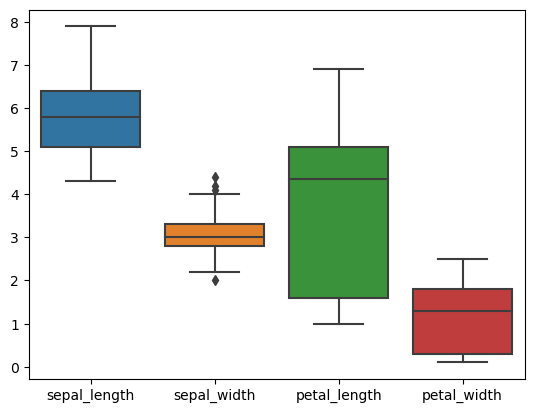

In [43]:
# 상자 수염 그림(박스 플롯)- 시각화 교안 21쪽
import seaborn as sns
sns.boxplot(data=iris)

In [50]:
iris['sepal_length'].rolling(5).mean()[4:30] # 인접 5개 평균

4     4.86
5     4.92
6     4.86
7     4.92
8     4.88
9     4.86
10    4.86
11    4.90
12    4.86
13    4.84
14    5.02
15    5.08
16    5.20
17    5.26
18    5.54
19    5.40
20    5.34
21    5.28
22    5.18
23    5.06
24    5.00
25    4.92
26    4.90
27    5.02
28    5.04
29    5.02
Name: sepal_length, dtype: float64

## 8.2 요약 통계량
- describe() 

In [51]:
# 1) 기본 요약 통계량
iris.describe() # 기본값: 숫자열에서의 요약 통계량

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [52]:
iris['species'].describe()
iris.species.describe() # 데이터 갯수, 종류, 최빈데이터, 최빈데이터갯수

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [53]:
# 2) descibe()의 include와 exclude매개변수
df=pd.DataFrame({'a':[1,2,3]*2,
                'b':[2.1,4]*3,
                'c':['aaa','aaa','bbb','ccc','ddd','eee'],
                'd':[True, False]*3})
df

,a,b,c,d
0,1,2.1,aaa,True
1,2,4.0,aaa,False
2,3,2.1,bbb,True
3,1,4.0,ccc,False
4,2,2.1,ddd,True
5,3,4.0,eee,False


In [54]:
df.describe() # 숫자열만 기본요약 통계량 출력

,a,b
count,6.000000,6.000000
mean,2.000000,3.050000
std,0.894427,1.040673
min,1.000000,2.100000
25%,1.250000,2.100000
50%,2.000000,3.050000
75%,2.750000,4.000000
max,3.000000,4.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       6 non-null      int64  
 1   b       6 non-null      float64
 2   c       6 non-null      object 
 3   d       6 non-null      bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 278.0+ bytes


In [56]:
# include 매개변수 통해 요약통계량을 출력할 타입 지정
df.describe(include=['float64','bool','object'])

,b,c,d
count,6.000000,6,6
unique,NaN,5,2
top,NaN,aaa,True
freq,NaN,2,3
mean,3.050000,NaN,NaN
std,1.040673,NaN,NaN
min,2.100000,NaN,NaN
25%,2.100000,NaN,NaN
50%,3.050000,NaN,NaN
75%,4.000000,NaN,NaN


In [57]:
# include 매개변수 통해 요약통계량을 출력할 타입 지정
df.describe(include='all')

,a,b,c,d
count,6.000000,6.000000,6,6
unique,NaN,NaN,5,2
top,NaN,NaN,aaa,True
freq,NaN,NaN,2,3
mean,2.000000,3.050000,NaN,NaN
std,0.894427,1.040673,NaN,NaN
min,1.000000,2.100000,NaN,NaN
25%,1.250000,2.100000,NaN,NaN
50%,2.000000,3.050000,NaN,NaN
75%,2.750000,4.000000,NaN,NaN


In [59]:
# exclude 매개변수 이용, 기본통계량 출력에서 제외할 타입 지정
df.describe(exclude=['float64'])

,a,c,d
count,6.000000,6,6
unique,NaN,5,2
top,NaN,aaa,True
freq,NaN,2,3
mean,2.000000,NaN,NaN
std,0.894427,NaN,NaN
min,1.000000,NaN,NaN
25%,1.250000,NaN,NaN
50%,2.000000,NaN,NaN
75%,2.750000,NaN,NaN


In [60]:
df['c'].unique() # 특정 컬럼의 고유값들의 종류

array(['aaa', 'bbb', 'ccc', 'ddd', 'eee'], dtype=object)

In [61]:
# 고유값들의 빈도
df['c'].value_counts()

aaa    2
bbb    1
ccc    1
ddd    1
eee    1
Name: c, dtype: int64

## 8.3 공분산/상관계수

In [62]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [63]:
# 공분산: (x1-x1평균* (x2-x2평균*)들의 합을 n-1로 나눗값
X.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [64]:
# -1< 상관계수(공분/(x1의 표준편차*x2의 표준편차))<1
X.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [ ]:
# https
://matplotlib.org/stable/tutorials/colors/c
olormaps.html colormap
# 

AttributeError: QuadMesh.set() got an unexpected keyword argument 'vmiv'

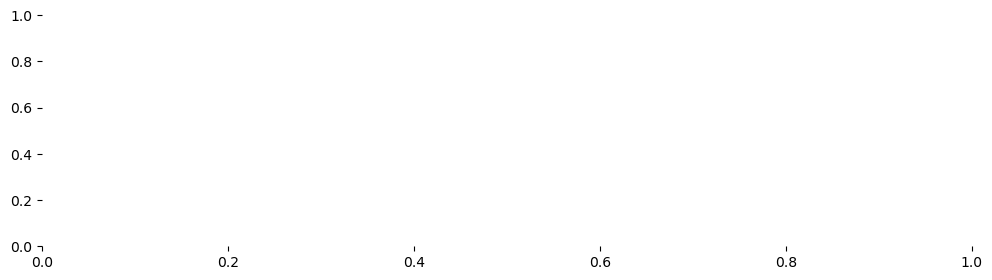

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,3))
sns.heatmap(X.corr(),vmiv=-1,vmax=1, annot=True, fmt='.2f',cmap='Greens')
plt.show()

#